# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
simulator = simulation.Simulator(results, waves = 1, bundles =   100000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/OPTICS/SIM/optic-sim/simulation.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


  0%|          | 0/1 [00:00<?, ?it/s]

foo0
foo0
foo0
hack0

  _     ._   __/__   _ _  _  _ _/_   Recorded: 05:53:36  Samples:  282
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.681     CPU time: 0.685
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-5f9ff51e-a16f-419e-81b6-35c7d8863f70.json

0.680 run_code  IPython/core/interactiveshell.py:3400
└─ 0.680 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 0.680 run_all_waves  simulation.py:27
      ├─ 0.633 run  simulation.py:32
      │  ├─ 0.425 record_results  simulation.py:121
      │  │  ├─ 0.173 histogram  stats_cuda.py:43
      │  │  │  ├─ 0.100 subplot  matplotlib/pyplot.py:1101
      │  │  │  │  └─ 0.100 add_subplot  matplotlib/figure.py:655
      │  │  │  │     └─ 0.099 __init__  matplotlib/axes/_subplots.py:16
      │  │  │  │        └─ 0.099 __init__  matplotlib/projections/polar.py:783
      │  │  │  │           ├─ 0.065 wrapper  matplotlib/_api/depr

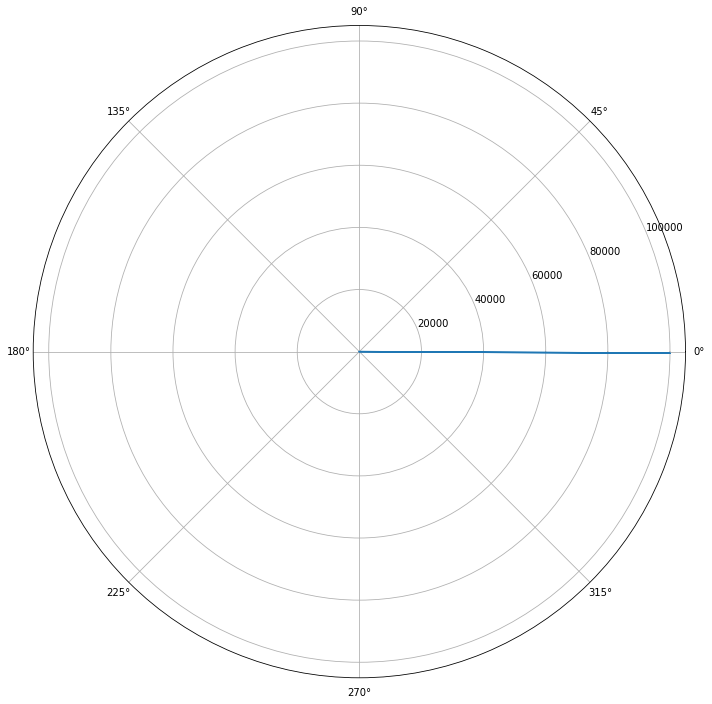

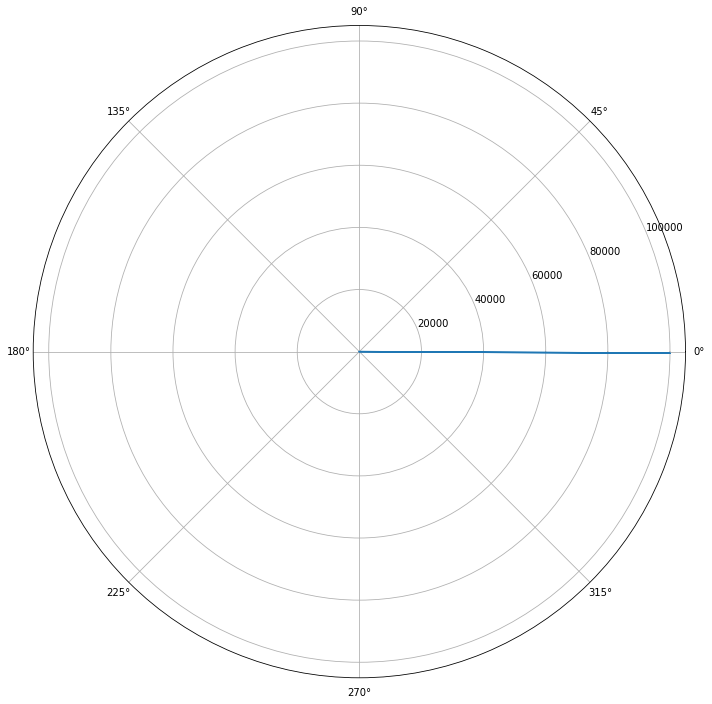

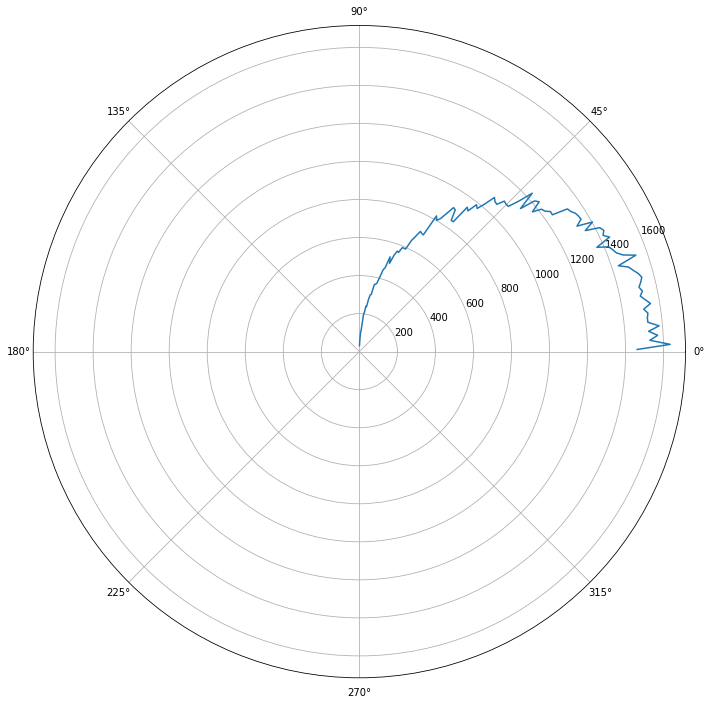

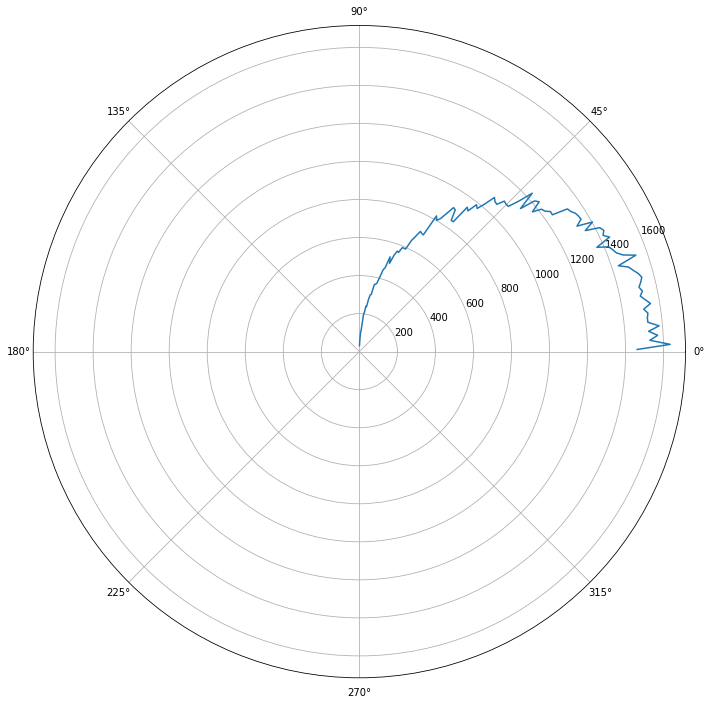

In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))
print(cp.sum(results._box_stage._histogram_4d_count._hist))
print(cp.sum(results._diffuser_stage._histogram_4d_count._hist))


100000.0
100000.0
57923.0


photon bundle count: 100000
photon total energy (J): 1.789590862296336e-06


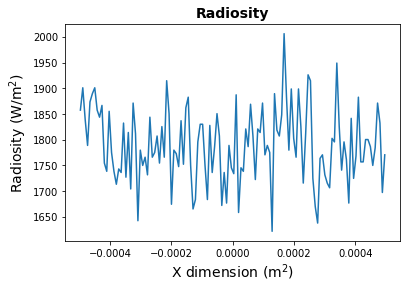

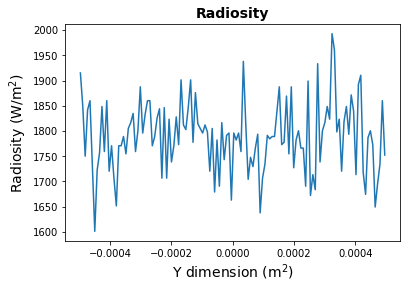

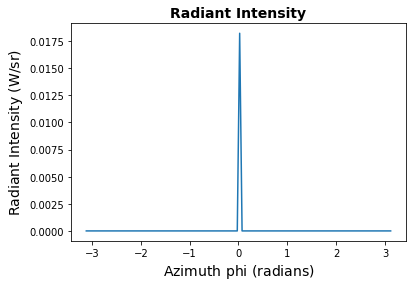

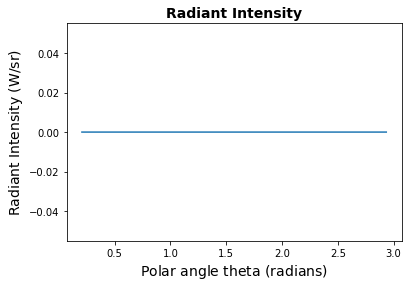

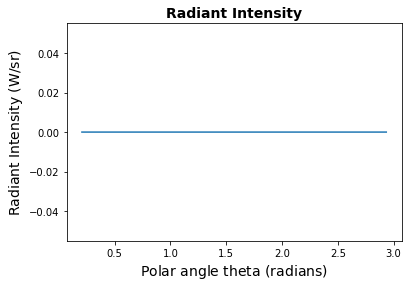

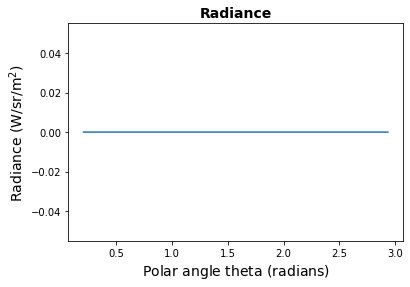

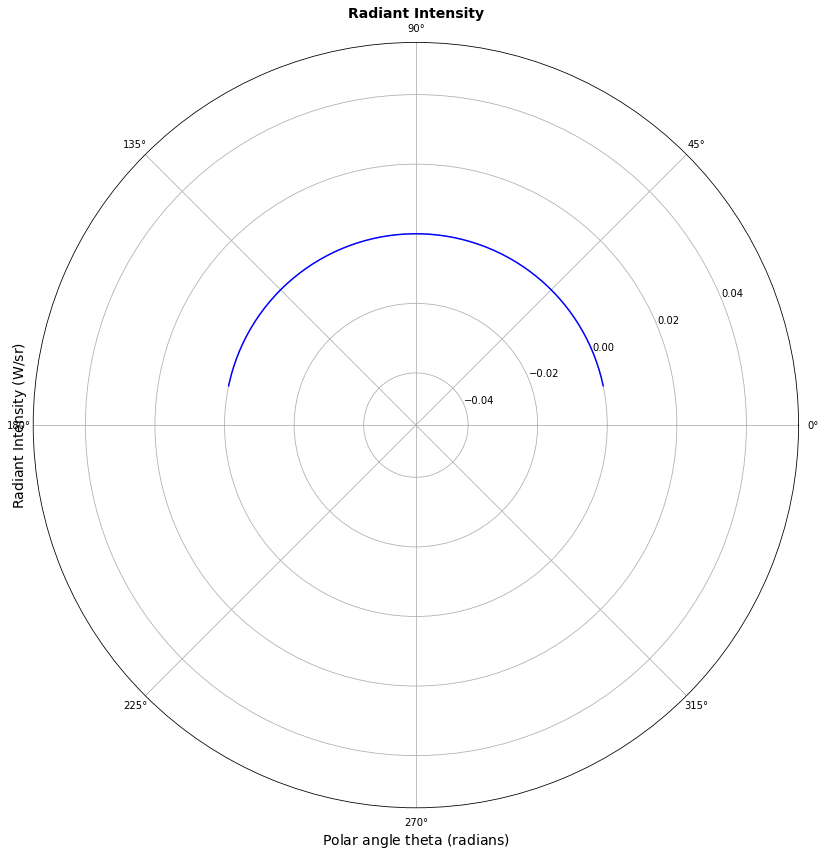

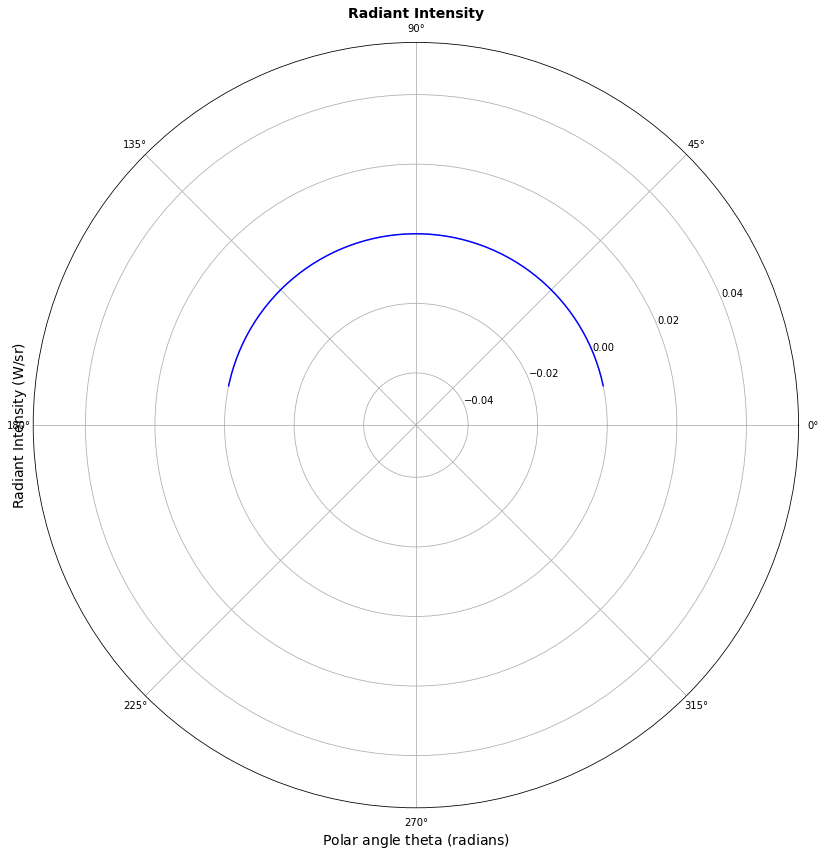

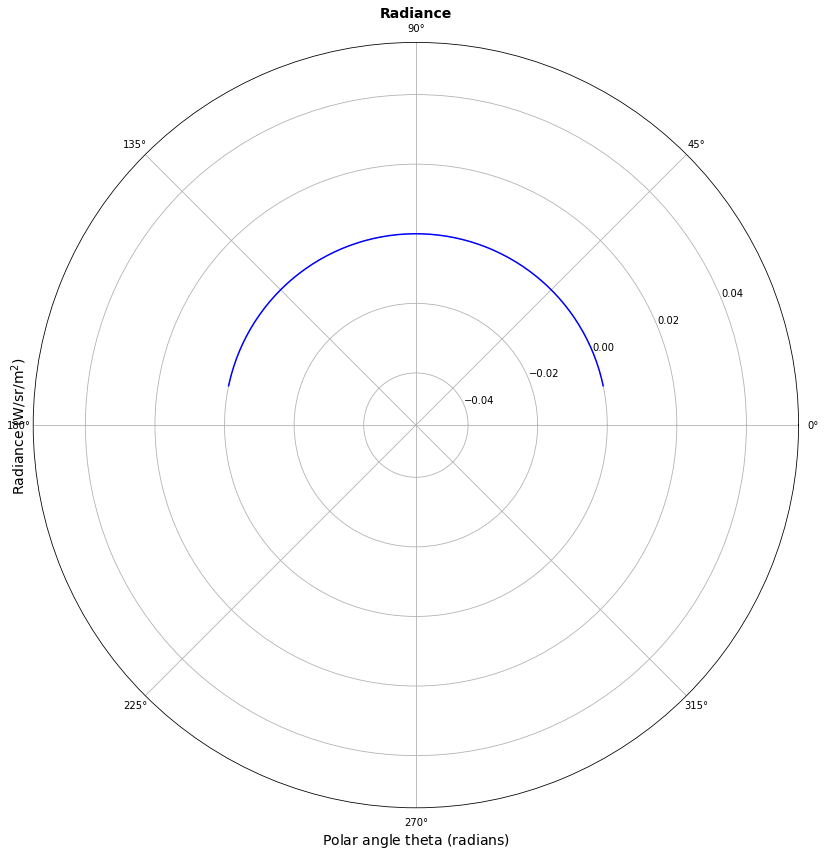

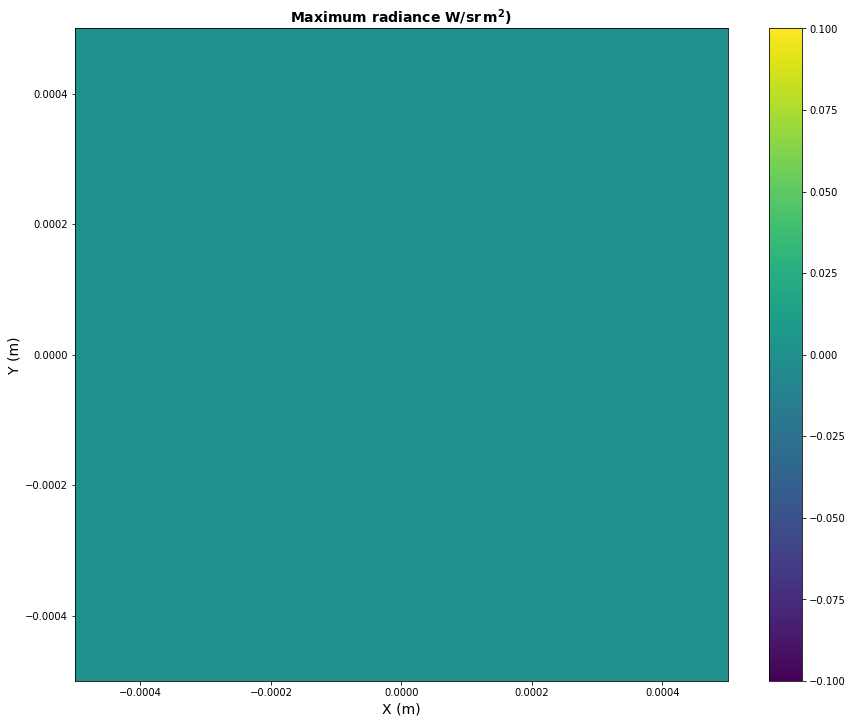

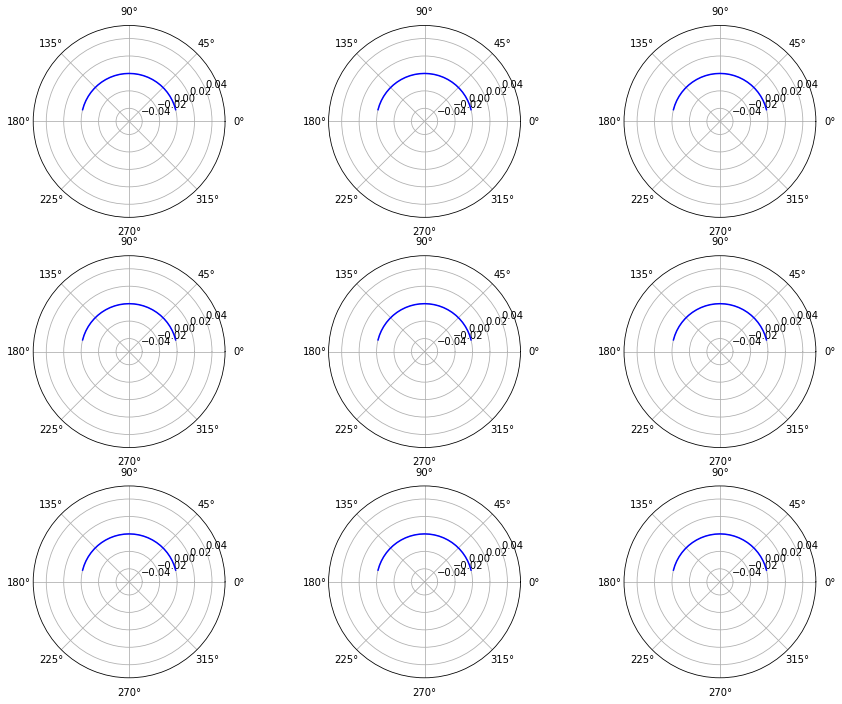

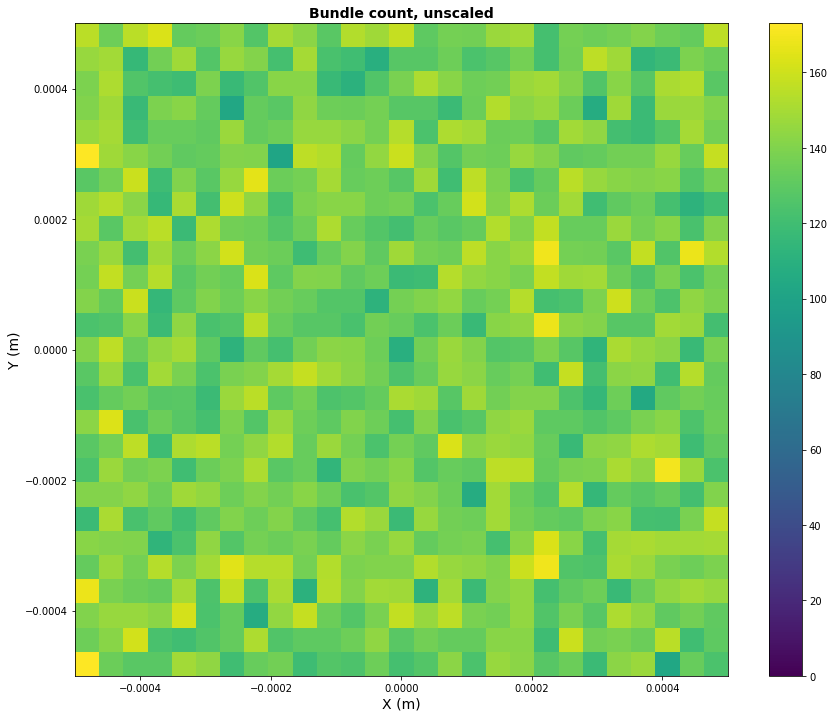

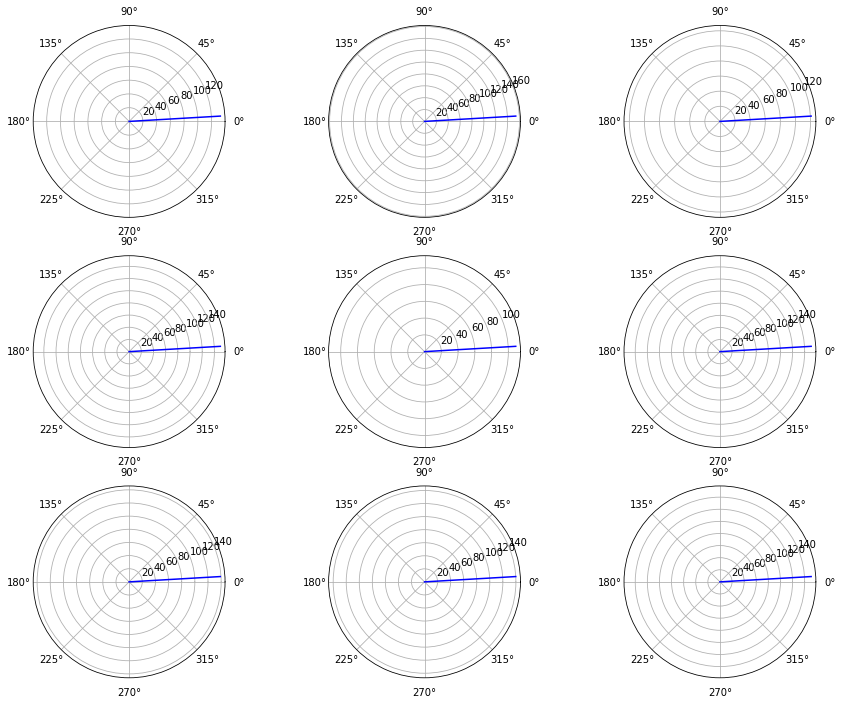

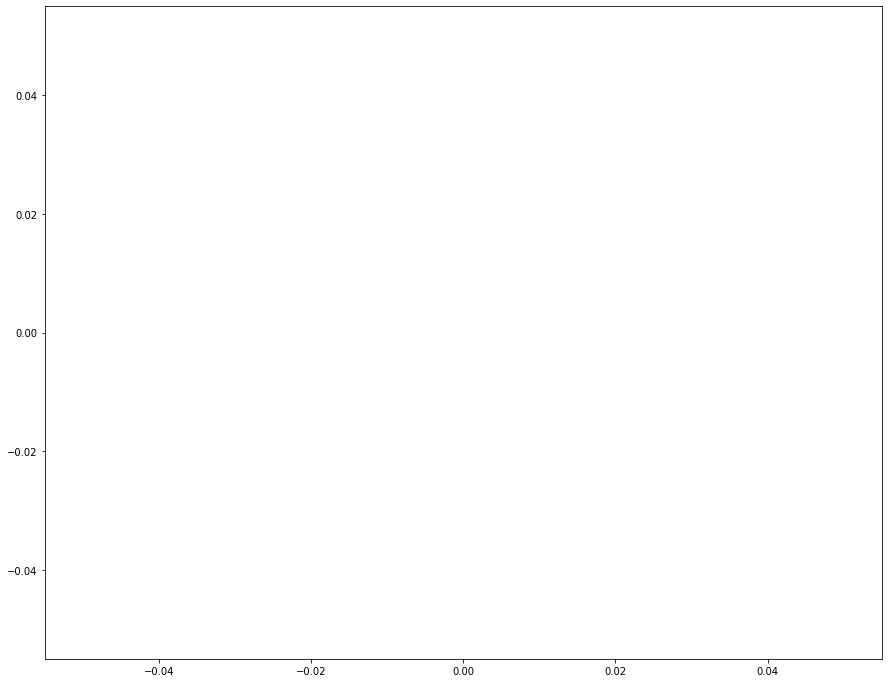

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

photon bundle count: 100000
photon total energy (J): 1.789590862296336e-06


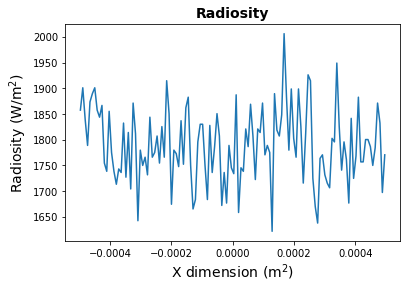

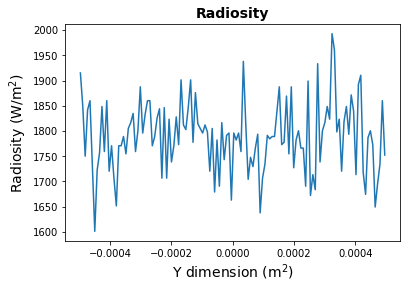

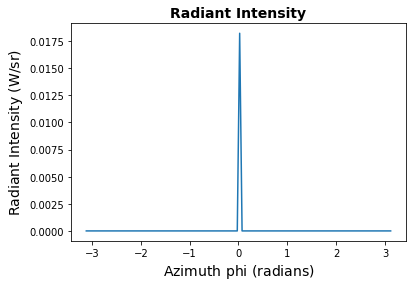

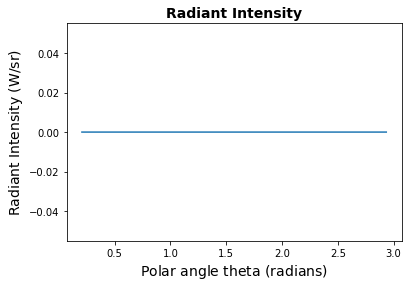

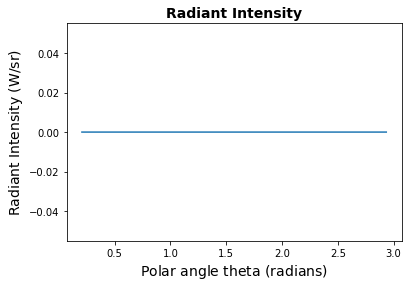

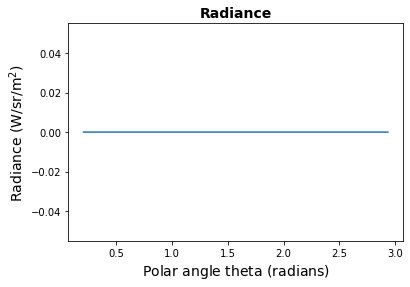

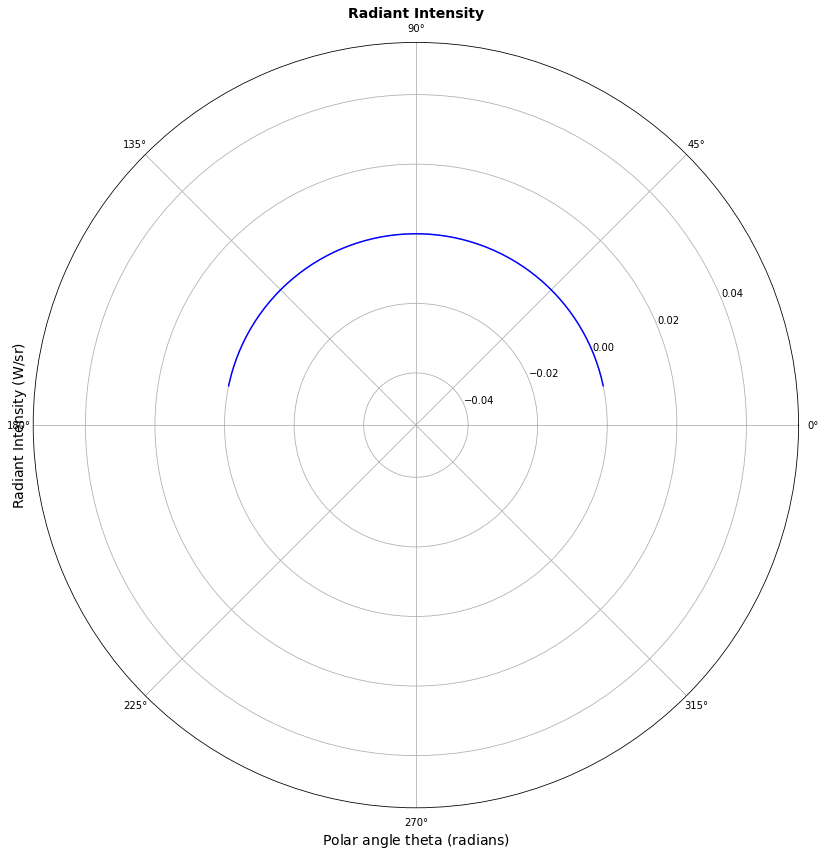

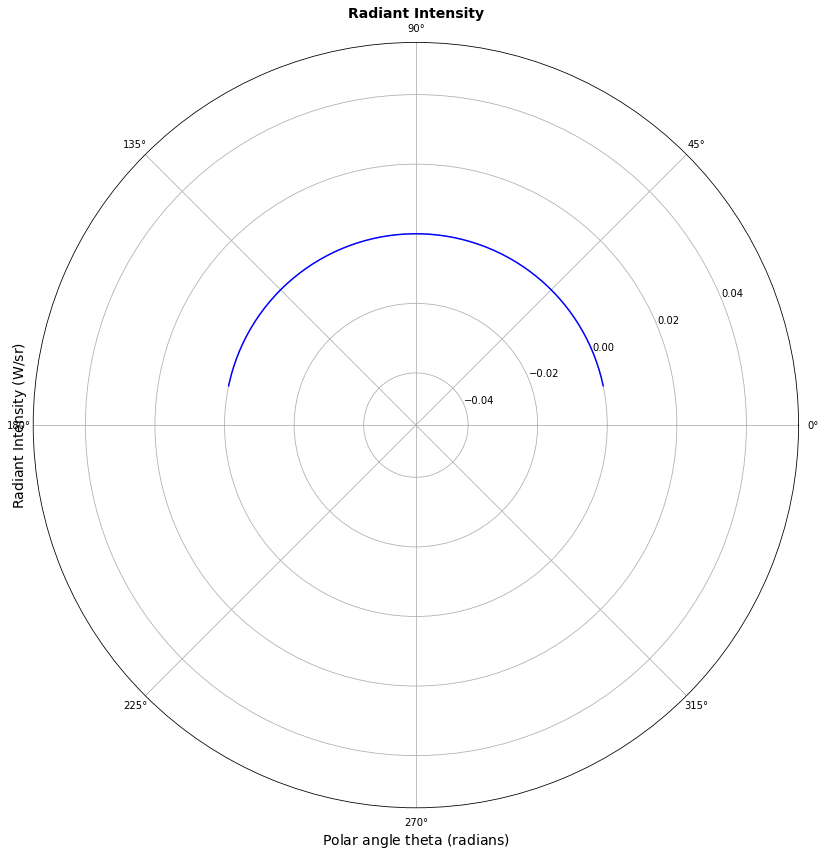

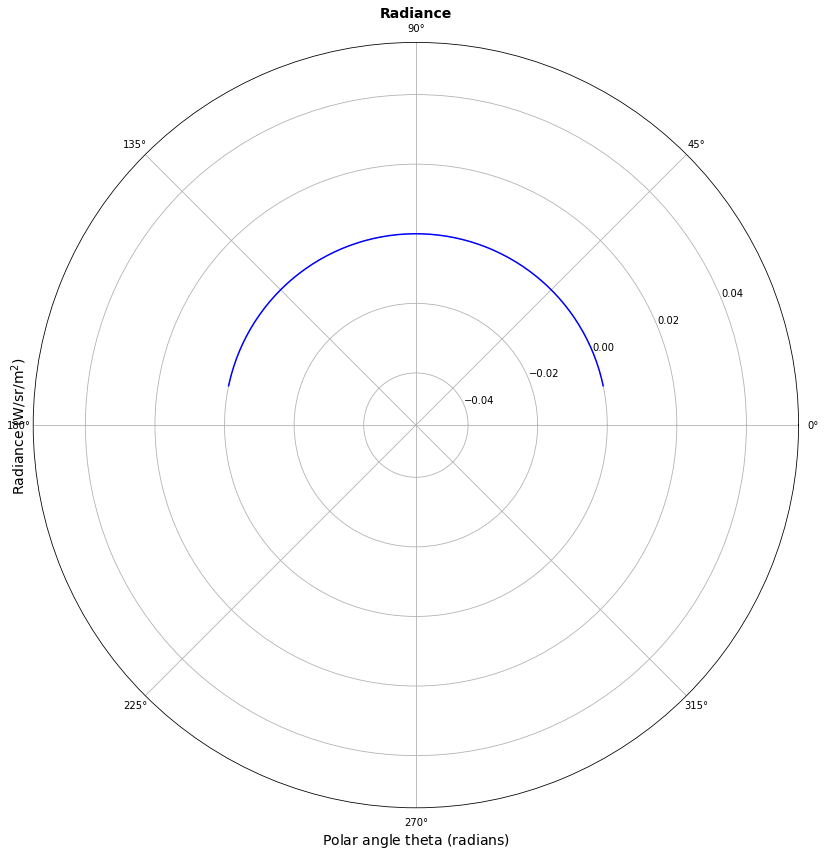

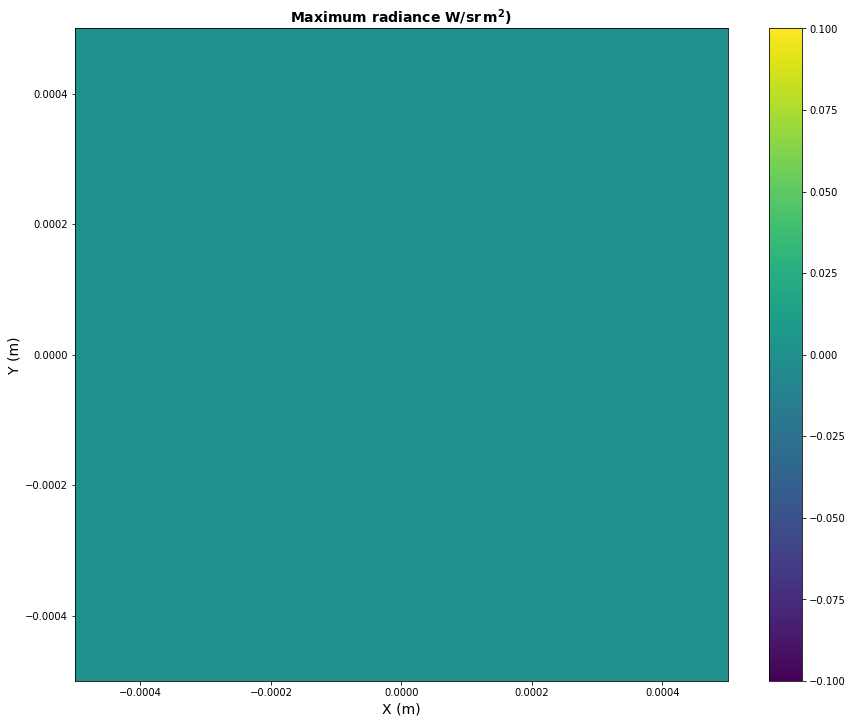

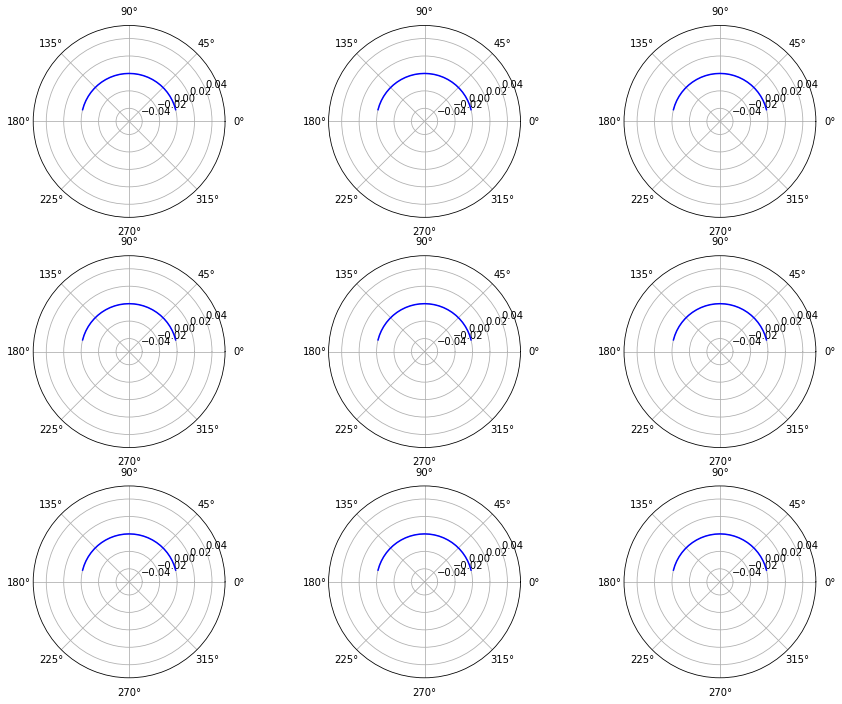

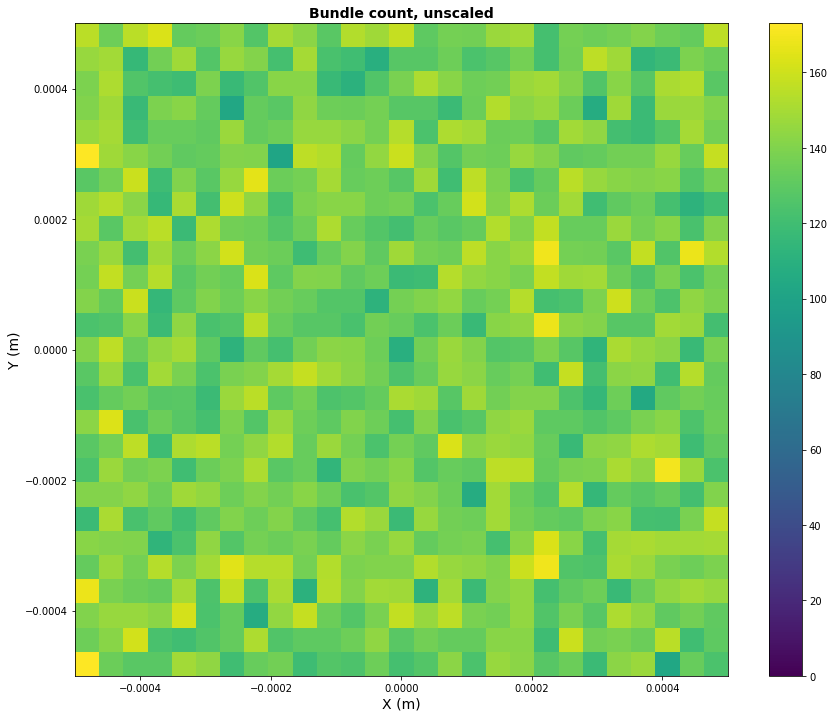

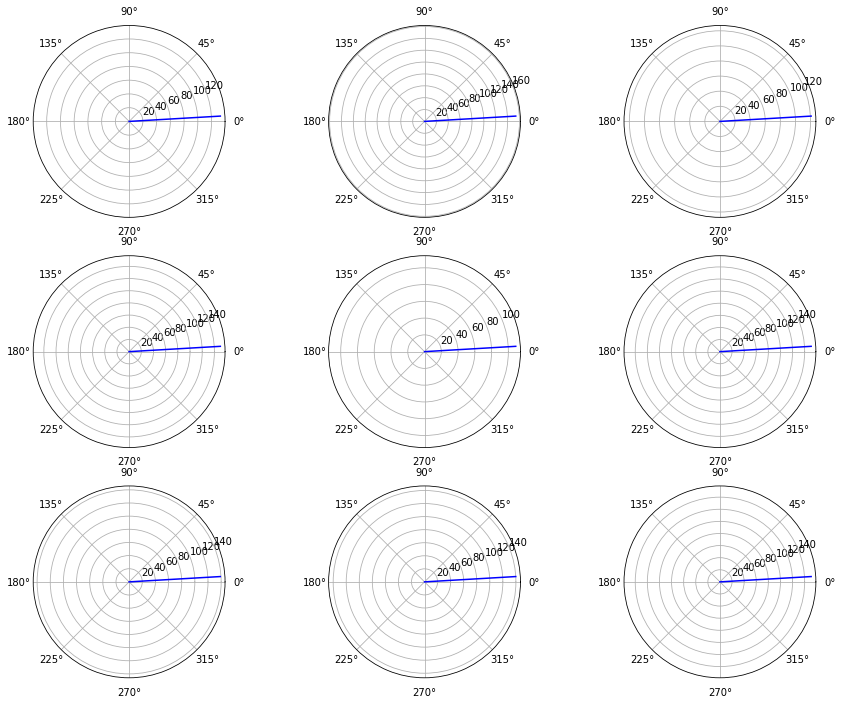

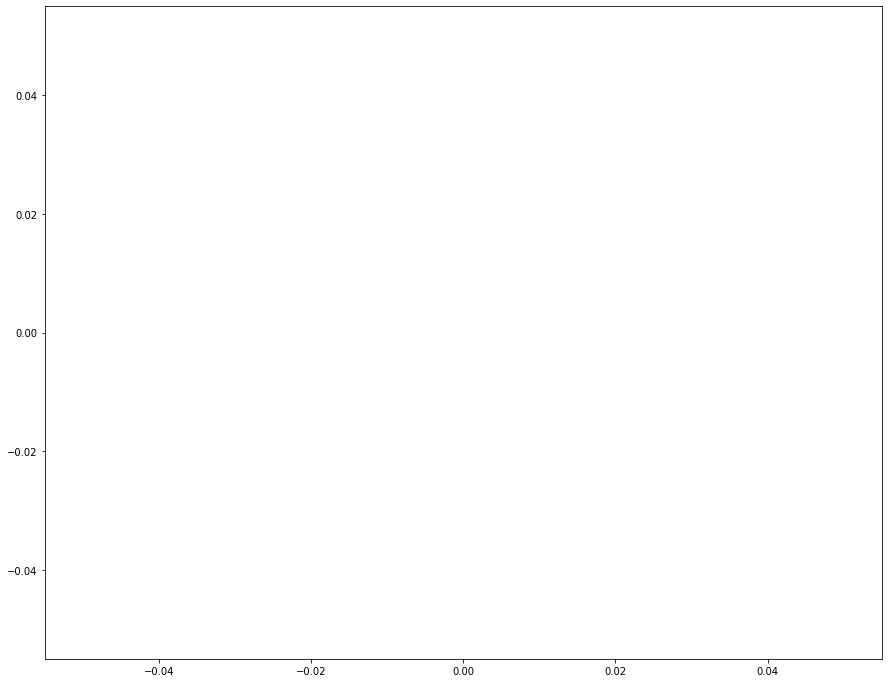

Output()

In [5]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

photon bundle count: 57923
photon total energy (J): 1.0365847151679064e-06


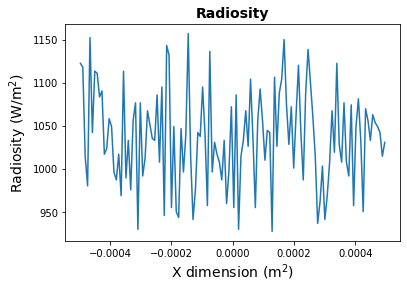

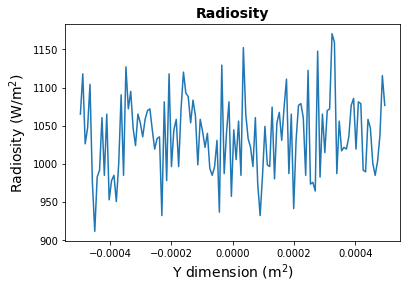

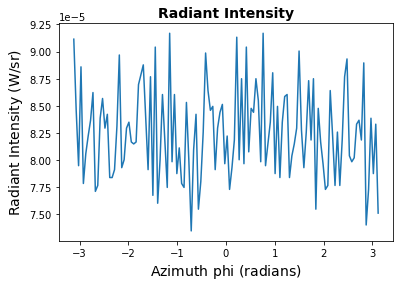

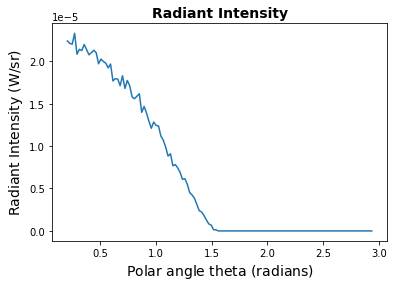

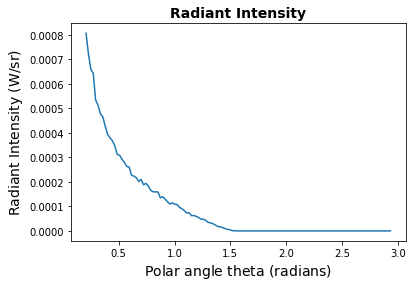

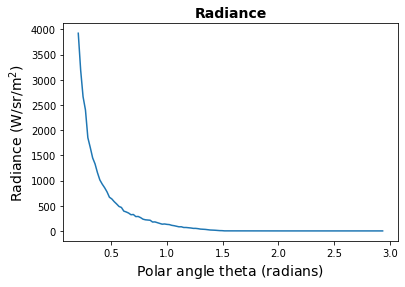

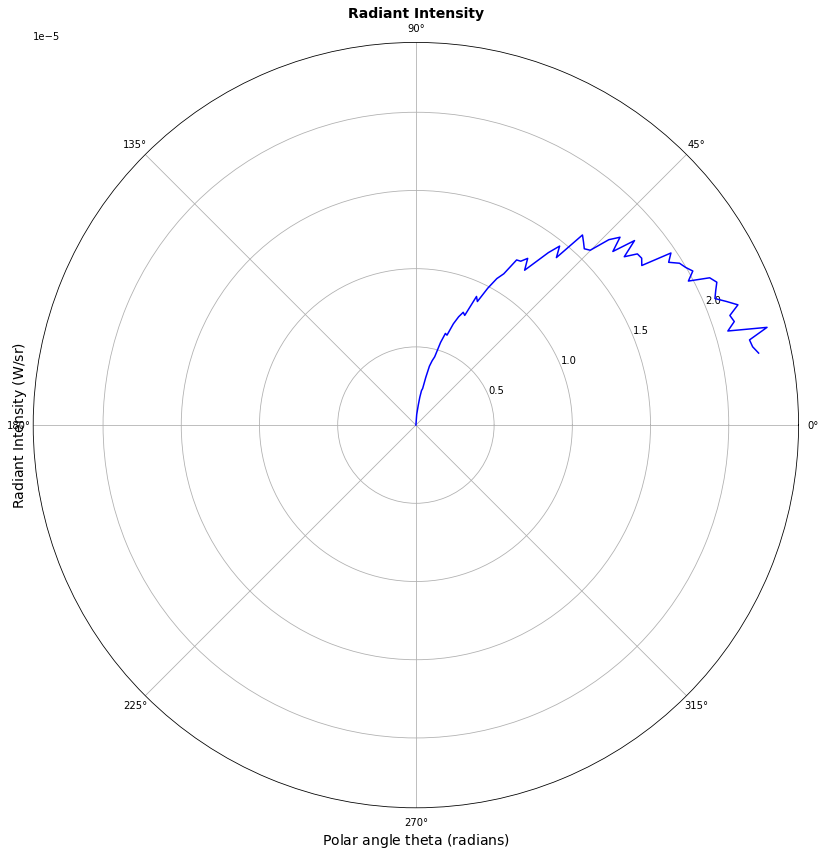

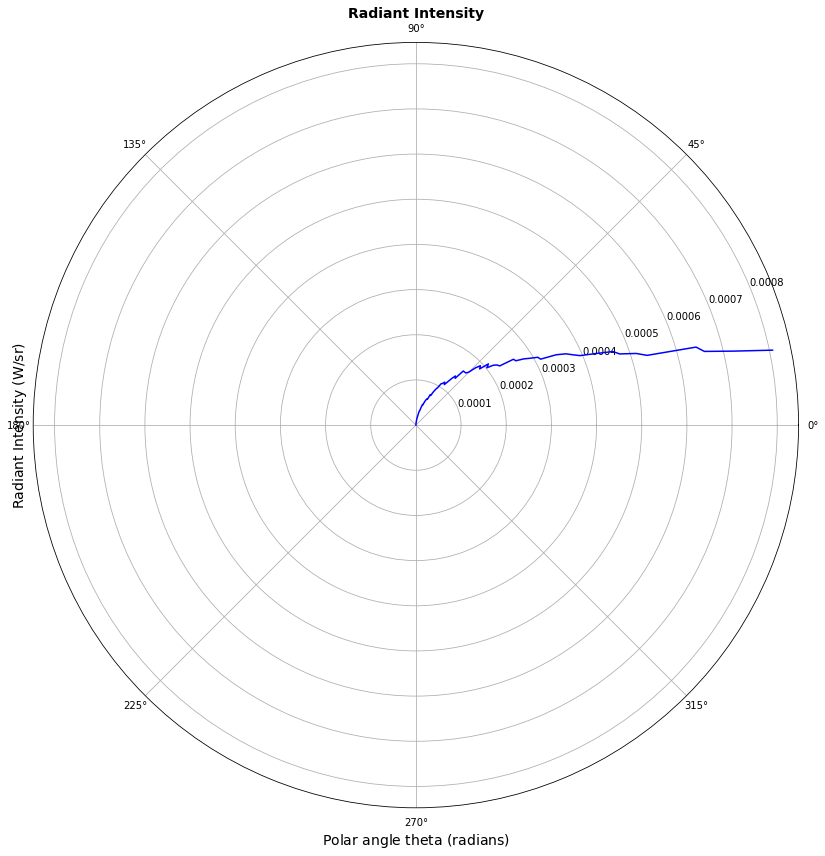

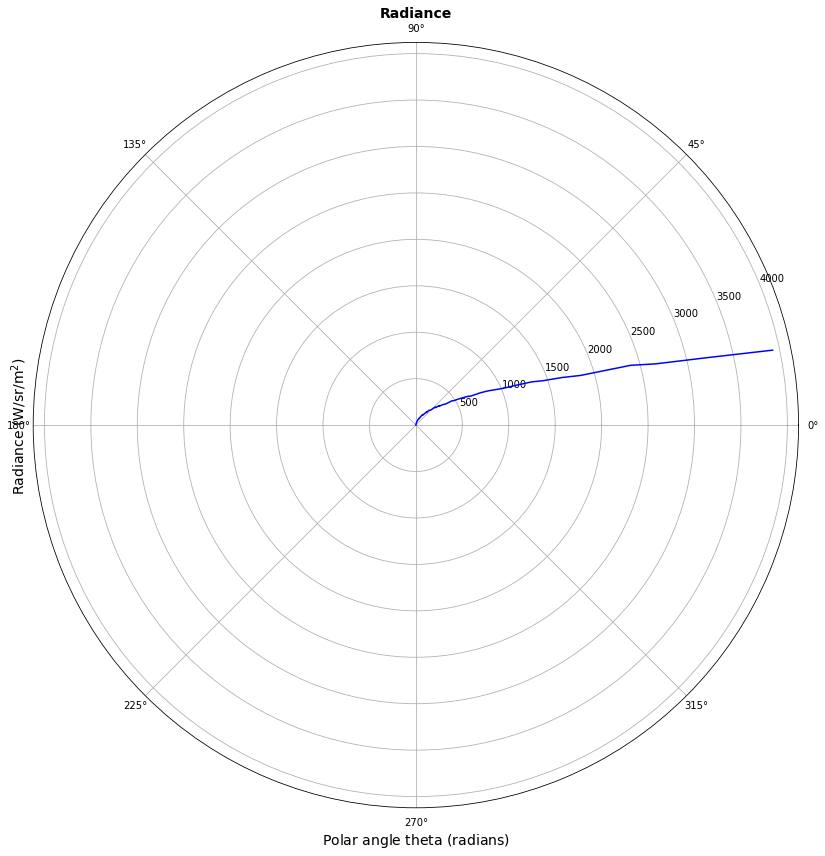

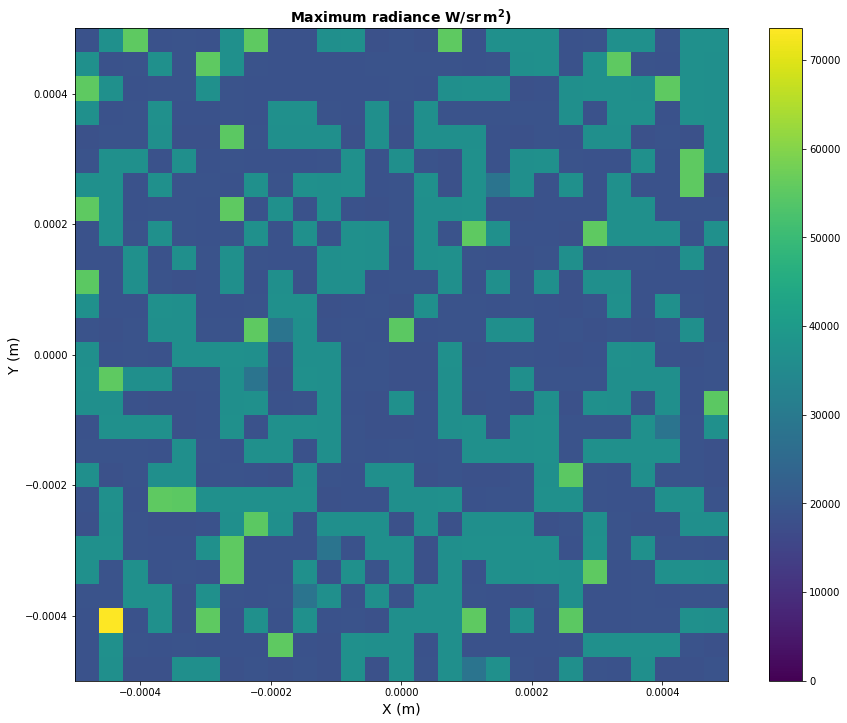

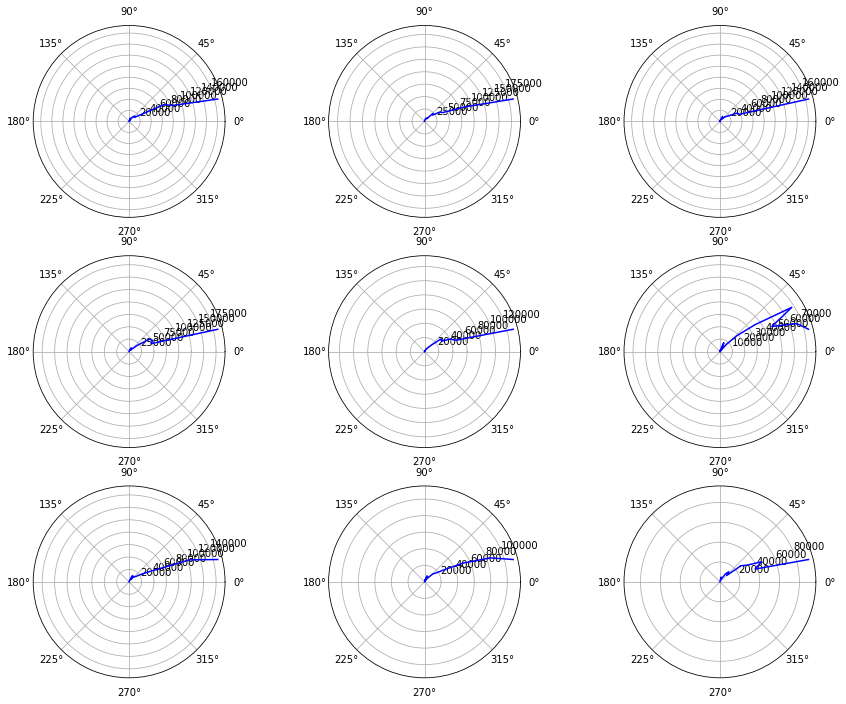

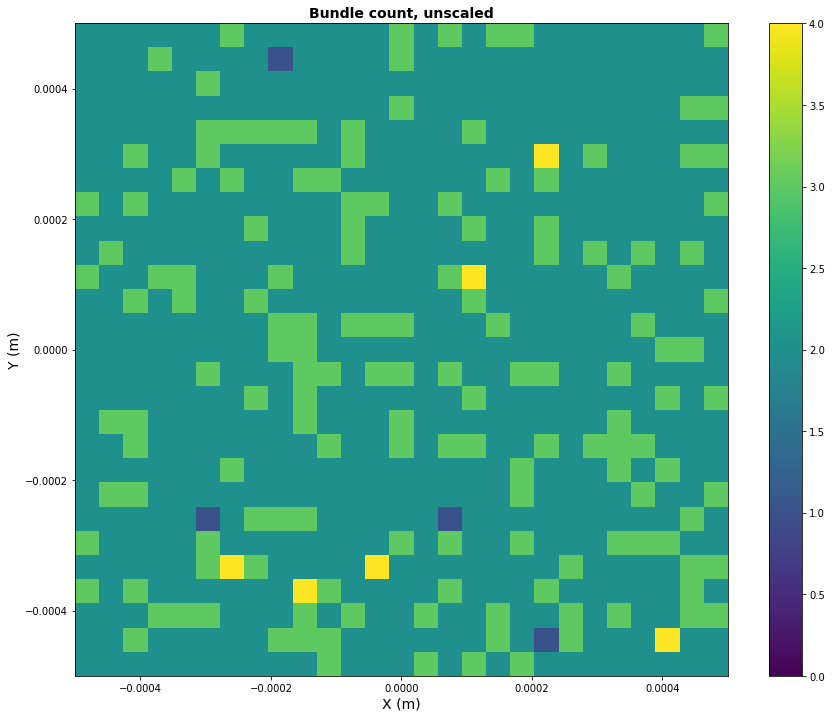

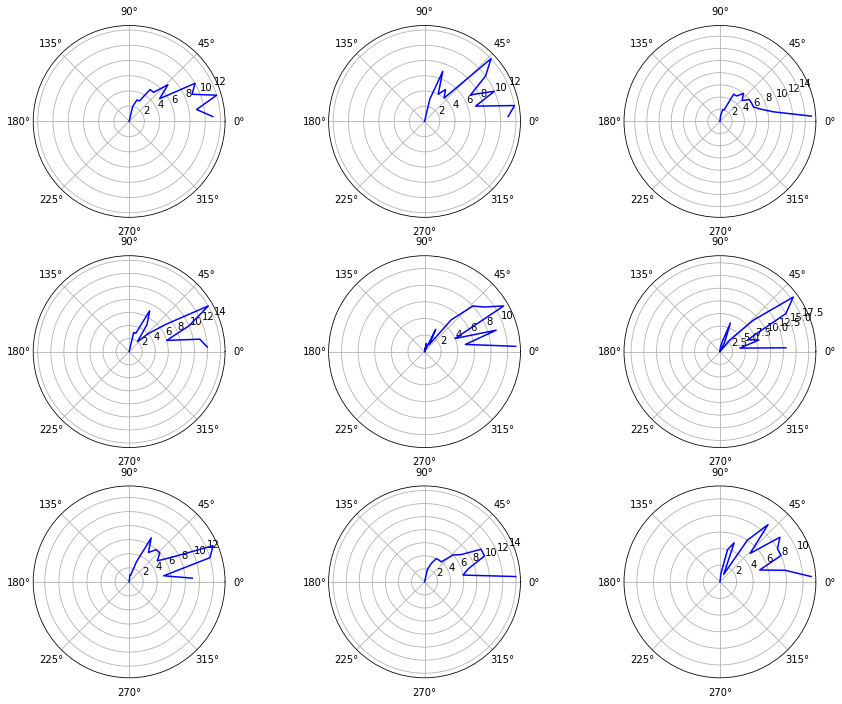

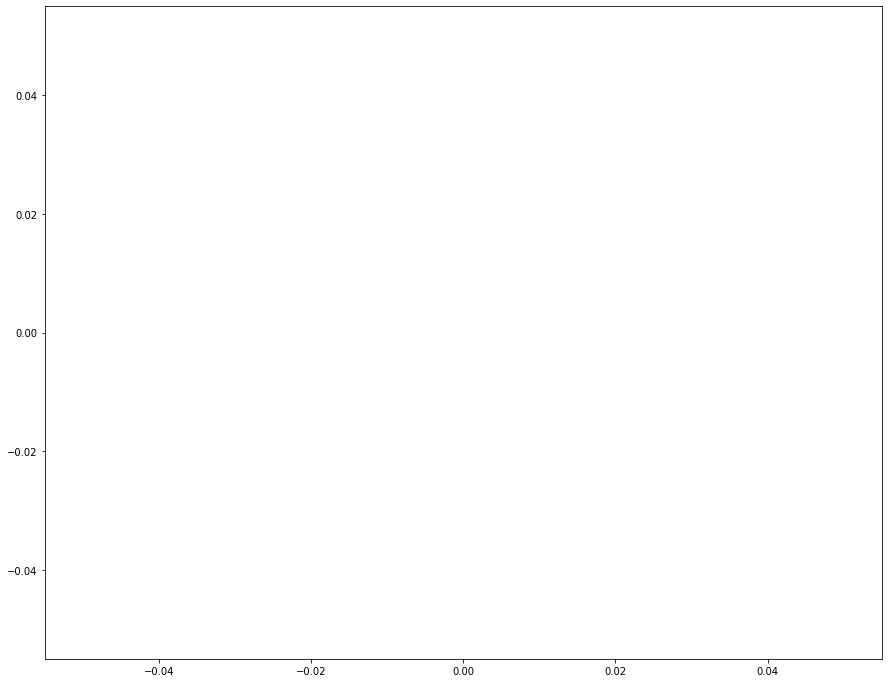

Output()

In [6]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

photon bundle count: 0
photon total energy (J): 0


TypeError: 'NoneType' object is not subscriptable

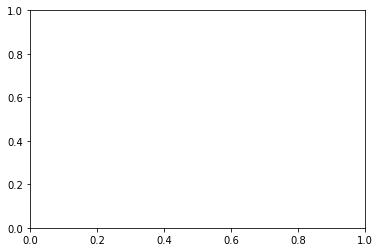

In [7]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

In [ ]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

In [ ]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

In [ ]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])